# MNIST Clustering by using KMeans

In [1]:
# We study the clustering of MNIST by using KMeans.
# We determine the number of clusters by evaluating
# the inertia and silhouette score. 
#
# MINST contains the image of digits from 0 to 9
# The data can be downloaded from 
# https://www.kaggle.com/jonathanadamlind/mnist-train

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
df=pd.read_csv("train.csv",index_col=0)

In [4]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 784)

In [6]:
X=df.values
y=df.index.values

In [7]:
row,col=X.shape

In [8]:
# Scale the data with zero mean and unit standard deviation
from sklearn.preprocessing import scale
X=scale(X)

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# Clustering by using KMeans

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [10]:
# Set the number of cluster size for testing
Cluster_size=[6,8,10,12,14,16,18]

In [11]:
def Cluster_size_evaluation(Cluster_size,data):
    inertia=[]
    silhouette=[]
    sample_size=5000
    for i in Cluster_size:
        model=KMeans(n_clusters=i,n_init=20,max_iter=600,tol=5e-5)
        model.fit(data)
        # Intertia
        inertia.append(model.inertia_)
        # Silhouette Score
        silhouette.append(metrics.silhouette_score(data, model.labels_,metric='euclidean',sample_size=sample_size))
    return inertia,silhouette

In [12]:
inertia,silhouette=Cluster_size_evaluation(Cluster_size,X)

In [13]:
np.diff(inertia)

array([-714836.30000483, -548154.89791232, -438861.02989832,
       -394101.84894788, -350388.6123841 , -315406.82711759])

In [14]:
def plotting_Cluster_size_evaluation(inertia,silhouette):
    plt.figure(figsize=(8,12))
    plt.subplot(211)
    plt.plot(Cluster_size,inertia)
    plt.scatter(Cluster_size,inertia)
    plt.title("Inertia")
    plt.ylabel("Inertia")
    plt.xlabel("Cluster Size")
    plt.subplot(212)
    plt.plot(Cluster_size,silhouette)
    plt.scatter(Cluster_size,silhouette)
    plt.title("Silhoutte Score")
    plt.ylabel("Silhoutte Score")
    plt.xlabel("Cluster Size")
    plt.tight_layout()

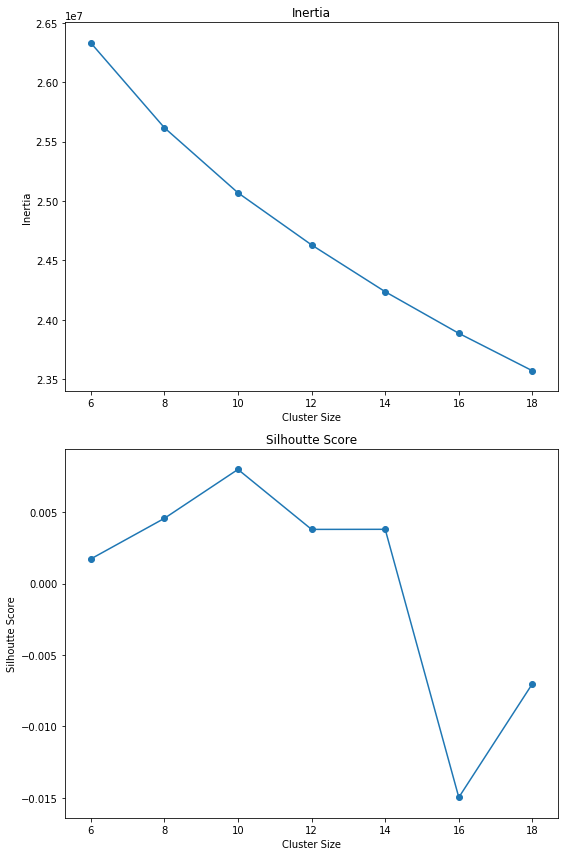

In [15]:
plotting_Cluster_size_evaluation(inertia,silhouette)

# KMeans using PCA to reduce the number of components

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA()

In [18]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
transformed=pca.transform(X)

In [20]:
# Normalize the variance of pca
var=pca.explained_variance_/sum(pca.explained_variance_)
# Calculate the cumulative sum of pca's variance
cumvar=np.cumsum(var)

In [27]:
# Get the starting index when cumulative sum attains 0.9
index_cumvar=np.where(cumvar>=0.95)
index_cumvar[0][0]

319

In [28]:
# Components have the sum of variance up to 90%
pca_vec=transformed[:,0:index_cumvar[0][0]]

In [29]:
pca_inertia,pca_silhouette=Cluster_size_evaluation(Cluster_size,pca_vec)

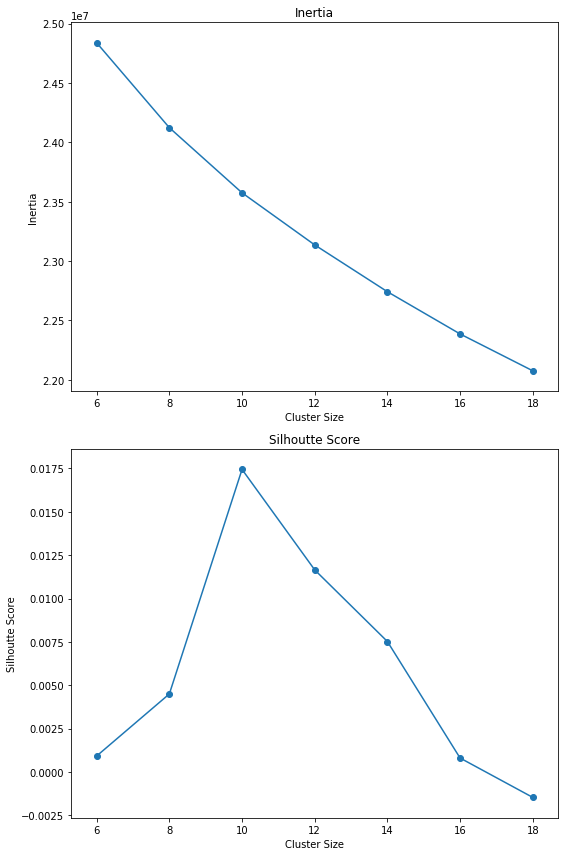

In [30]:
plotting_Cluster_size_evaluation(pca_inertia,pca_silhouette)